In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [79]:
df = pd.read_csv('data/Iris.csv')

In [80]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Cleaning and Preprocessing

In [81]:
df.isnull().sum().sum()

np.int64(0)

Since there are no missing values, there is no need for null handling<br>
we'll drop the "id" column from the dataset as it doesnot contribute to the model training

In [82]:
df.drop(columns=['Id'], inplace=True)

In [83]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [84]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [85]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

the data is evenly distributed

In [86]:
# getting the number of duplicate rows
df.duplicated().sum()

np.int64(3)

In [87]:
# drop the duplicate values from the dataset
df.drop_duplicates(inplace=True)
df.duplicated().sum()   

np.int64(0)

## Exploratory Data Analysis

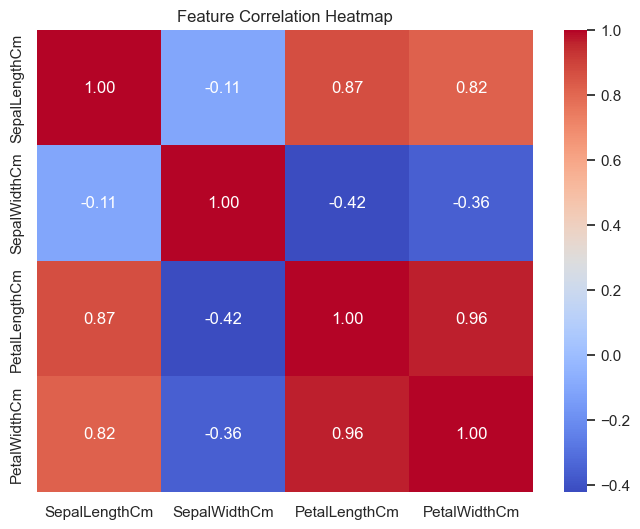

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(columns=['Species']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


After the correlation heatmap, we conclude that the PetalLengthCm and PetalWidthCm are the two most correlated features with 0.96 score

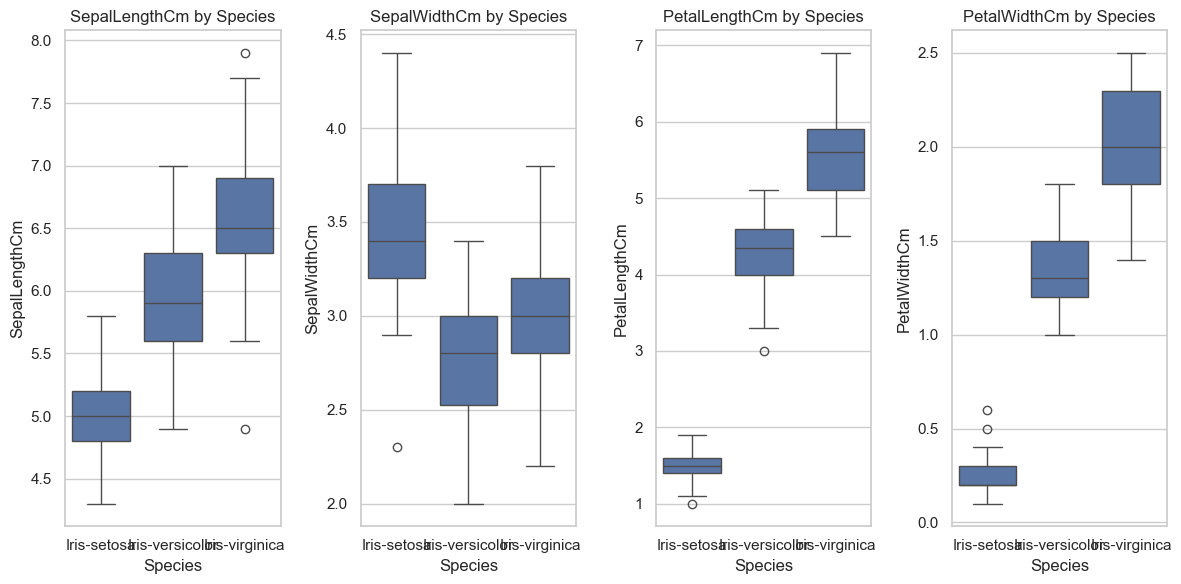

In [89]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(y=column, x='Species', data=df)
    plt.title(f"{column} by Species")
plt.tight_layout()
plt.show()

some minor outliers in Iris-setosa and Iris virginica in PetalLengthCm and SepalLengthCm respectively.

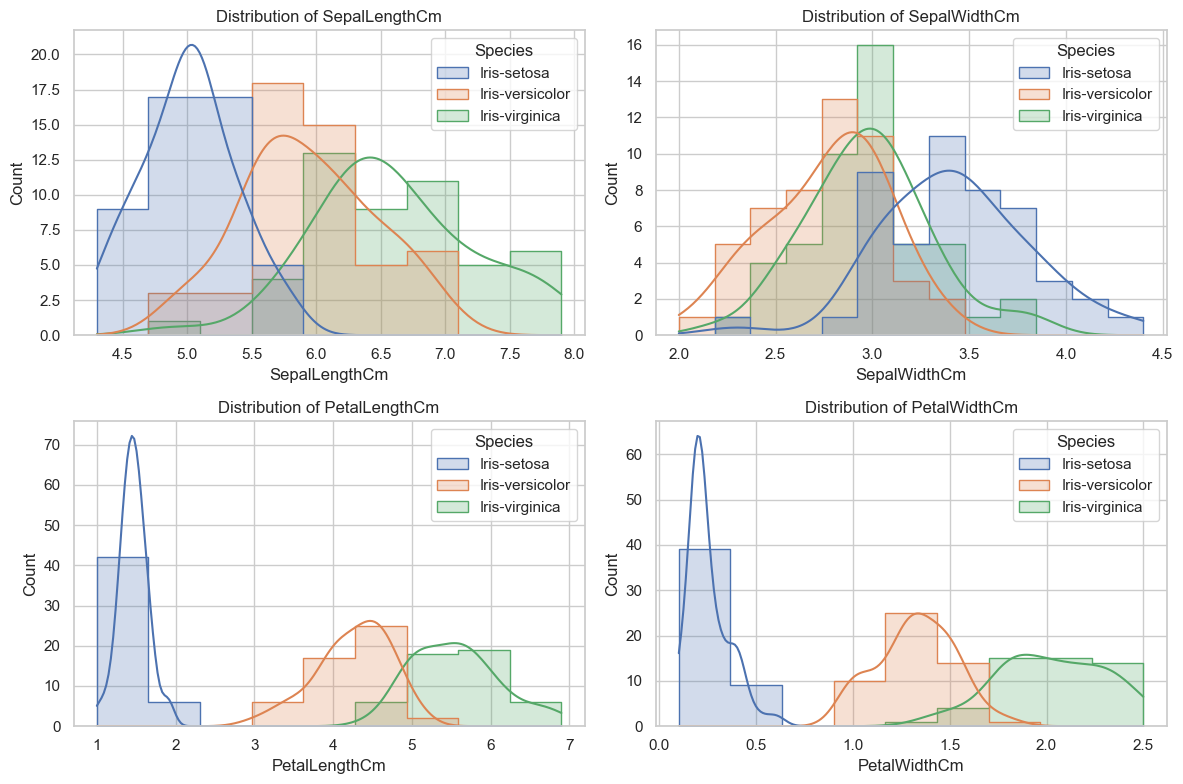

In [90]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=column, hue='Species', kde=True, element='step')
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

The SepalWidthCm is the weakest distribution as the plot clearly shows that the distribution overlaps

### Encoding the target column ("Species")

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


## TRAINING

#### NORMALISATION

In [92]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Species', axis=1)
y = df['Species']

# Normalisation using standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [93]:
from sklearn.model_selection import train_test_split

# Mmaking a train-test split of 80-20 (with 80% being training split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#### MODEL IMPORTING AND INSTANCING

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Creating model instances
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel='linear'),   # Linear SVM
    "SVM (RBF)": SVC(kernel='rbf'), # Radial Basis Function SVM
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [95]:
# Fitting the models

model_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_score = model.score(X_test, y_test)
    
    model_scores[model_name] = model_score

    print(f"{model_name} : {model_score}")

Logistic Regression : 0.9333333333333333
KNN : 0.9333333333333333
SVM (Linear) : 1.0
SVM (RBF) : 0.9666666666666667
Naive Bayes : 0.9333333333333333
Decision Tree : 0.9666666666666667
Random Forest : 0.9666666666666667
Gradient Boosting : 0.9666666666666667


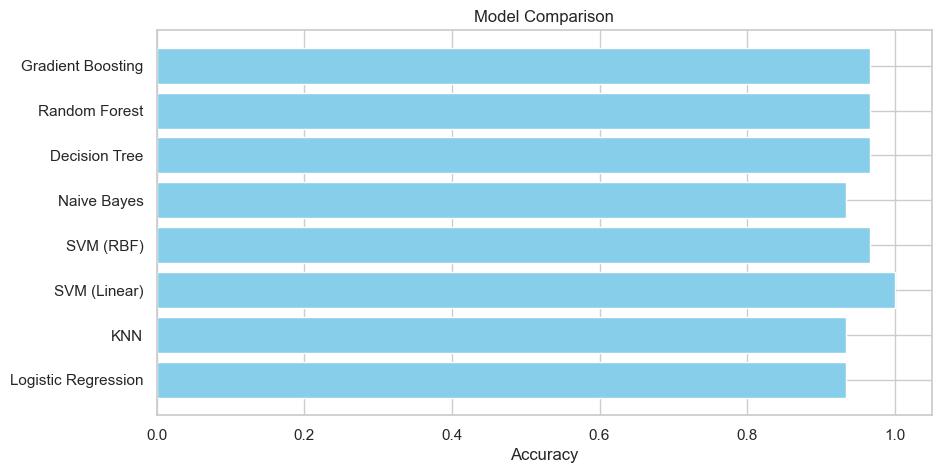

In [96]:
# Plot the comparison
plt.figure(figsize=(10, 5))
plt.barh(list(model_scores.keys()), list(model_scores.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Comparison")
plt.grid(True)
plt.show()

In [97]:
# Feature contribution analysis in Linear SVM model
model = models["SVM (Linear)"]
feature_names = df.drop('Species', axis=1).columns
coefs = model.coef_

# For multiclass (One-vs-Rest), take mean or max of absolute values across classes
importance = np.mean(np.abs(coefs), axis=0)

# Create a dataframe for better visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

         Feature  Importance
3   PetalWidthCm    1.212752
2  PetalLengthCm    1.101979
1   SepalWidthCm    0.269003
0  SepalLengthCm    0.246032


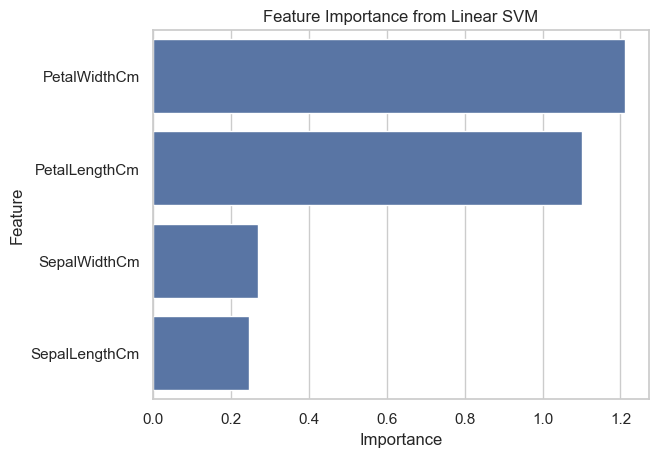

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance from Linear SVM")
plt.show()

## Insights and conclusion

We observe that Linear SVM performs the best with an accuracy score of 1.0
<br>
Further, GradientBoosting classifier, Radial basis SVM and RandomForest classifier models are the closest with an accuracy of 9.67

In [98]:
# finalising Linear SVM using joblib
import joblib

joblib.dump(models["SVM (Linear)"], 'model/iris_model.pkl')

['model/iris_model.pkl']